In [34]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [35]:
#Vamos colocar as biblioteca 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [36]:
#Carregar o arquivo 

dados = pd.read_csv('dataset.csv')

dados.head(11)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
5,2023-01-06,39.330036
6,2023-01-07,50.377749
7,2023-01-08,54.187174
8,2023-01-09,55.870943
9,2023-01-10,62.912079


In [37]:
dados.shape

(365, 2)

In [38]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [39]:
#Teremos que converter a coluna data que esta em string como Dataiime e transformar nossa dataframe em uma analise de series temporais

dados['Data'] = pd.to_datetime(dados['Data'])

dados.head()


,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [41]:
serie_temporal = dados.set_index('Data')['Total_Vendas']

In [42]:
serie_temporal = serie_temporal.asfreq('D')

In [43]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

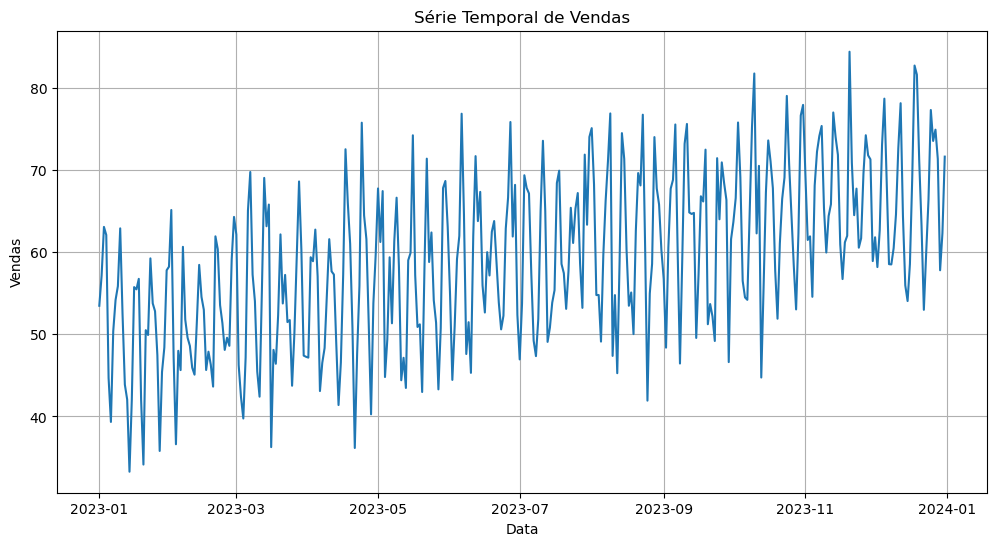

In [44]:
#Agora como esta convertido, vamos iniciar a nossa Analise, iremos demonstrar 
#Cria o gráfico da série temporal

plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()


In [81]:
#Este projeto demonstra a aplicação de técnicas de análise de séries temporais na previsão de vendas de produtos. A capacidade de prever com precisão as vendas futuras é crucial para uma gestão eficaz do estoque, planejamento financeiro e tomada de decisões estratégicas.



In [74]:
modelo = SimpleExpSmoothing(serie_temporal)
ajuste = modelo.fit()

In [75]:
previsao = ajuste.forecast(steps=30)

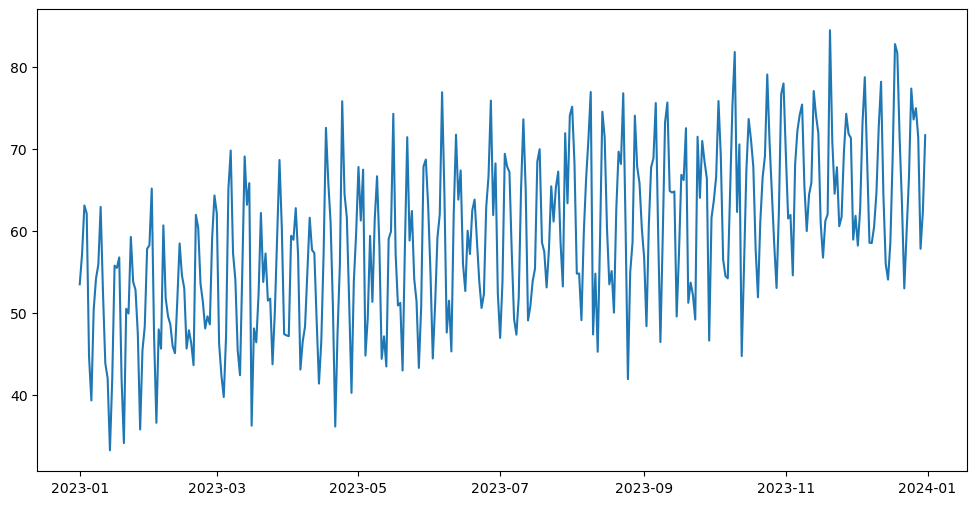

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label='Série Temporal Original')

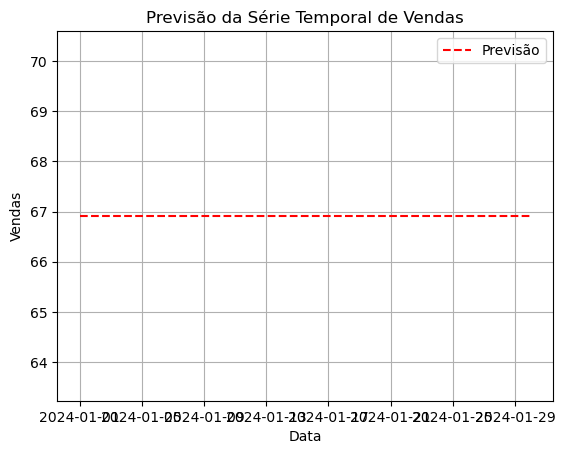

In [80]:
plt.plot(previsao.index, previsao.values, color='red', linestyle='--', label='Previsão')

plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Previsão da Série Temporal de Vendas')
plt.legend()
plt.grid(True)
plt.show()